In [1]:
!python -m pip install --upgrade --no-deps --force-reinstall git+https://github.com/ttopac/keras-resnet.git@original_regularization_w2D
# !python -m pip install --upgrade --no-deps --force-reinstall git+https://github.com/broadinstitute/keras-resnet.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ttopac/keras-resnet.git (to revision original_regularization_w2D) to /tmp/pip-req-build-3c3lx1gt
  Running command git clone -q https://github.com/ttopac/keras-resnet.git /tmp/pip-req-build-3c3lx1gt
  Running command git checkout -b original_regularization_w2D --track origin/original_regularization_w2D
  Switched to a new branch 'original_regularization_w2D'
  Branch 'original_regularization_w2D' set up to track remote branch 'original_regularization_w2D' from 'origin'.
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=23371 sha256=6d3c9a3ea7d7bbf565b1a34c3ce6b394f61d5e6e8b00e6cc9c71d0ac6e5f3c58
  Stored in directory: /tmp/pip-ephem-wheel-cache-h1y4ewsh/wheels/cb/9a/93/151e56cd383b086116afce8aa113e84fc4d6618c807dbeb93b
Successfully built keras-resnet
  Attempting uninstall: keras-resnet
    Found existing installation: ker

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import datetime
from tensorflow.python import tf2
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from PIL import Image


In [3]:
# Create an empty numpy array to put Lira test data
X_test_lira = np.zeros((21, 28, 28))

# Then put the actual test data
for i in range(21):
  img = Image.open(f'{i}_grayresized.jpg')
  np_img = np.asarray(img)
  X_test_lira[i,:,:] = np_img

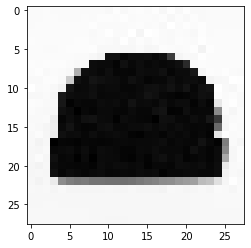

In [4]:
plt.imshow(X_test_lira[0], cmap='gray')

In [4]:
X_test_lira = X_test_lira.reshape((21,28,28,1))

In [5]:
Y_test_lira = np.array(['hat', 'hat', 'hat', 'hat', 'hat', 'trouser', 'shirt', 'trouser', 'trouser', 'trouser', 'trouser', 'trouser', 'trouser', 'trouser', 'trouser', 'trouser', 'pullover', 'top', 'pullover', 'hat', 'hat'])

In [6]:
#checking shape
print (X_test_lira.shape)
print (Y_test_lira.shape)

(21, 28, 28, 1)
(21,)


In [7]:
# Normalize the images. It works better for backpropagation 
X_test_lira_original = X_test_lira
X_test_lira = X_test_lira / 255

# This time we are not doing flattening because CNN takes 2D.

In [ ]:
# import keras_resnet.models
# import keras_resnet.layers
# from keras.models import load_model

# classes = 10

# resnet_model = keras_resnet.models.ResNet2D18(classes=classes, freeze_bn=True)
# resnet_bn_layer = keras_resnet.layers.ResNetBatchNormalization(freeze=True)

# model = load_model('model_ResNet18.h5', custom_objects={'ResNet2D18':keras_resnet.models.ResNet18, 'BatchNormalization':resnet_bn_layer})

# predicted = model.predict(X_test_lira)


In [38]:
import keras_resnet.models

shape = (28, 28, 1)
classes = 10
x = keras.layers.Input(shape)

model = keras_resnet.models.ResNet2D18(classes=classes, freeze_bn=True)

model.load_weights("model_weights_ResNet18_v2")
predicted = model.predict(X_test_lira)

print (predicted.shape)

1/1 [==============================] - 1s 758ms/step
(21, 10)


In [39]:
#remembering original class names
orig_class_name = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [40]:
predicted[0]

array([7.6607585e-01, 2.1688067e-03, 8.1999868e-02, 7.5252232e-04,
       3.0196165e-03, 2.9230613e-04, 4.7918148e-02, 2.3351093e-05,
       9.7723231e-02, 2.6271571e-05], dtype=float32)

In [41]:
predicted_ixs = np.argmax(predicted, axis=1)

In [46]:
for i in range(predicted_ixs.shape[0]):
  predicted_name = orig_class_name[predicted_ixs[i]]
  actual = Y_test_lira[i]
  print (f"Image #{i}: Actual: {actual} vs. Predicted: {predicted_name}")

Image #0: Actual: hat vs. Predicted: top
Image #1: Actual: hat vs. Predicted: top
Image #2: Actual: hat vs. Predicted: bag
Image #3: Actual: hat vs. Predicted: top
Image #4: Actual: hat vs. Predicted: top
Image #5: Actual: trouser vs. Predicted: trouser
Image #6: Actual: shirt vs. Predicted: bag
Image #7: Actual: trouser vs. Predicted: shirt
Image #8: Actual: trouser vs. Predicted: bag
Image #9: Actual: trouser vs. Predicted: trouser
Image #10: Actual: trouser vs. Predicted: trouser
Image #11: Actual: trouser vs. Predicted: bag
Image #12: Actual: trouser vs. Predicted: trouser
Image #13: Actual: trouser vs. Predicted: trouser
Image #14: Actual: trouser vs. Predicted: trouser
Image #15: Actual: trouser vs. Predicted: trouser
Image #16: Actual: pullover vs. Predicted: shirt
Image #17: Actual: top vs. Predicted: top
Image #18: Actual: pullover vs. Predicted: pullover
Image #19: Actual: hat vs. Predicted: bag
Image #20: Actual: hat vs. Predicted: pullover


In [27]:
# Create an empty numpy array to put Lira test data
X_test_lira_set2 = np.zeros((30, 28, 28))

# Then put the actual test data
for i in range(X_test_lira_set2.shape[0]):
  img = Image.open(f'{i+100}_grayresized.jpg')
  np_img = np.asarray(img)
  X_test_lira_set2[i,:,:] = np_img

X_test_lira_set2 = X_test_lira_set2.reshape((30,28,28,1))
X_test_lira_set2 = X_test_lira_set2 / 255

In [51]:
shape = (28, 28, 1)
classes = 10
x = keras.layers.Input(shape)

model = keras_resnet.models.ResNet2D18(classes=classes, freeze_bn=True)

model.load_weights("model_weights_ResNet18_v2")

predicted_set2 = model.predict(X_test_lira_set2)

predicted_ixs_set2 = np.argmax(predicted_set2, axis=1)

1/1 [==============================] - 1s 742ms/step


In [52]:
Y_test_lira_set2 = np.array([
'text',
'pullover',
'top',
'trouser',
'pullover',
'set',
'top',
'pullover',
'top',
'trouser',
'pullover',
'set',
'top',
'pullover',
'top',
'trouser',
'pullover',
'set',
'top',
'trouser',
'pullover',
'set',
'top',
'pullover',
'pullover',
'top',
'trouser',
'pullover',
'set',
'top'])

In [53]:
for i in range(predicted_ixs_set2.shape[0]):
  predicted_name = orig_class_name[predicted_ixs_set2[i]]
  actual = Y_test_lira_set2[i]
  print (f"Image #{i+100}: Actual: {actual} vs. Predicted: {predicted_name}")

Image #100: Actual: text vs. Predicted: sandal
Image #101: Actual: pullover vs. Predicted: bag
Image #102: Actual: top vs. Predicted: bag
Image #103: Actual: trouser vs. Predicted: bag
Image #104: Actual: pullover vs. Predicted: bag
Image #105: Actual: set vs. Predicted: bag
Image #106: Actual: top vs. Predicted: top
Image #107: Actual: pullover vs. Predicted: shirt
Image #108: Actual: top vs. Predicted: top
Image #109: Actual: trouser vs. Predicted: bag
Image #110: Actual: pullover vs. Predicted: bag
Image #111: Actual: set vs. Predicted: bag
Image #112: Actual: top vs. Predicted: shirt
Image #113: Actual: pullover vs. Predicted: bag
Image #114: Actual: top vs. Predicted: top
Image #115: Actual: trouser vs. Predicted: bag
Image #116: Actual: pullover vs. Predicted: shirt
Image #117: Actual: set vs. Predicted: bag
Image #118: Actual: top vs. Predicted: top
Image #119: Actual: trouser vs. Predicted: bag
Image #120: Actual: pullover vs. Predicted: shirt
Image #121: Actual: set vs. Predic